## 28. Нелинейный метод наименьших квадратов

[More J. J., Garbow B. S., Hillstrom K. E. Testing unconstrained optimization software // ACM TOMS. 1981. 7 (1). 17--41]

Нелинейным методом наименьших квадратов
построить модели вида
$$
y = \beta_1 e^{-\beta_2 x}
\qquad
\mbox{и}
\qquad
y = \beta_1 e^{\frac{\beta_2}{x+\beta_3}}
$$
для данных, приведенных в таблице
```
  x         y    
----------------                
 50       34804    
 55       28610    
 60       23650    
 65       19630    
 70       16370    
 75       13720    
 80       11540    
 85        9744    
 90        8261    
 95        7030    
100        6005    
105        5147    
110        4427    
115        3820    
120        3307    
125        2872    
```
Найти общую ошибку в каждом из этих случаев и сравнить результаты.

*P.S. Значение y1 347804 заменено на 34804 по подозрению на мисклик.*

In [55]:
#подключение библиотек и функций
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [56]:
#задание исходных данных в виде массивов
x = np.arange(50, 126, 5)
# [50  55  60  65  70  75  80  85  90  95 100 105 110 115 120 125]
y = np.array([34804,28610,23650,19630,16370,13720,11540,9744,8261,7030,6005,5147,4427,3820,3307,2872])

Метод наименьших квадратов (далее МНК) широко применяется в решении различных систем уравнений, в том числе переопределенных, для аппроксимации точечных значений некоторой функции. Он основан на минимизации суммы квадратов отклонений некоторых функций от искомых переменных. То есть, $$\sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - f_i(x))^2 \to min$$

Для начала решим первое уравнение (модель): $$y_1 = \beta_1 e^{-\beta_2 x}\qquad$$
Прологарифмируем её по основанию е: $$ ln(y_1) = ln(\beta_1) - \beta_2 x $$
Выразим сумму квадратов ошибки: $$ \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - f_i(x))^2 = \sum_{i=1}^n (y_i - ln(\beta_1) + \beta_2 x)^2$$
Продифференцируем это уравнение по переменным $\beta_1$ и $\beta_2$ и приравняем к нулю: $$ \frac{\mathrm d}{\mathrm d \beta_1} \left( e_1^2 \right) =  -2 \frac{\sum_{i=1}^n(y_i - ln(\beta_1) + \beta_2 x)}{\beta_1} = 0  $$ $$ \frac{\mathrm d}{\mathrm d \beta_2} \left( e_1^2 \right) =  -2 x \sum_{i=1}^n(y_i - ln(\beta_1) + \beta_2 x) = 0  $$

Имеем систему из двух уравнений с двумя неизвестными, откуда выражаем:

ln $(\beta_1) = \frac{\sum_{i=1}^n (y_i)}{16} + \beta_2 \frac{\sum_{i=1}^n (x_i)}{16} $

$\beta_2 = - \frac { \frac{\sum_{i=1}^n (y_i x_i)}{16} - \frac{\sum_{i=1}^n (x_i)}{16} \frac{\sum_{i=1}^n (y_i)}{16}} {  \frac{\sum_{i=1}^n (x_i)}{16}^2 - \frac{\sum_{i=1}^n (x_i^2)}{16}  } $

Чтобы упростить формулы, обозначим $\bar{a}$ за $\frac {\sum_{i=1}^n (a)} {16}$

ln $(\beta_1) = \bar (y_i) - \beta_2 \bar(x_i)$

$\beta_2 = \frac {\bar (y_i x_i) - \bar (x_i) \bar(y_i)} {  \bar (x_i)^2 - \bar(x_i^2)  } $

, откуда $$   \beta_1 = 170 336, 8127     $$ $$   \beta_2 = 0, 0332     $$


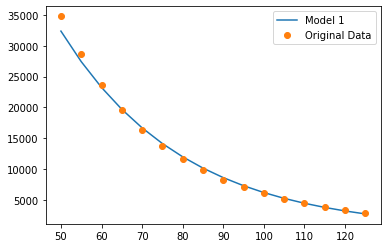

In [57]:
def func(x,b1,b2):
    return b1 * np.exp(-1*b2*x)
p = np.empty (16)
for i in range (0, 16):
    p[i] = func(x[i],170336.8127, 0.0332)
plt.plot(x, p, label='Model 1')
plt.plot(x, y, "o", label='Original Data')
plt.legend()
pass

Вычисление ошибки можно опустить, т. к. её величина очевидна. Теперь рассмотрим, как МНК реализован в компьютерной математике.

В библиотеке scipy есть функция curve_fit, использующая нелинейный метод наименьших квадратов для максимального совпадения построенной функции с исходными данными. На вход подаётся:

1) модель, по которой будет строиться функция, объявленная с помощью define,

2) массив значений х,

3) массив значений у,

4) массив предполагаемых значений переменных $\beta_1$, ..., $\beta_n$.

Результаты работы curve_fit, оптимальные значения переменных, присваиваются новому массиву переменных $\beta_1$, ..., $\beta_n$ , а  переменной "_" присваивается расчётная ковариация, в нашем случае не используемая. Затем создаём массив новых значений у с помощью функции из п. 1 и новых значений $\beta_1$, ..., $\beta_n$.

[b1 b2] = [2.02261388e+05 3.55594749e-02]


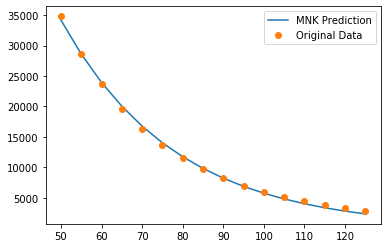

In [58]:
sug = [170336.8127, 0.0332]
def fun1(x,b1,b2):
    return b1 * np.exp(-1*b2*x)
y2 = np.empty (16,  dtype=np.float)
c, _ = curve_fit(fun1, x, y, sug)
print("[b1 b2] =", c)
for i in range(0, 16):
    y2[i] = fun1(x[i], c[0], c[1])
plt.plot(x, y2,  label='MNK Prediction')
plt.plot(x, y,  "o", label='Original Data')
plt.legend()
pass

Как видим, значения $\beta_1$ и $\beta_2$, полученные в первом случае, близки к настоящим, но функция curve_fit позволяет снизить суммарную ошибку, что говорит о её совершенности по сравнению с "ручным" решением.

Применим МНК, выраженный функцией curve_fit, на второй модели:  $ y = \beta_1 e^{\frac{\beta_2}{x+\beta_3}} $ :

[b1 b2 b3] = [6.24484598e-03 6.08987461e+03 3.42051181e+02]


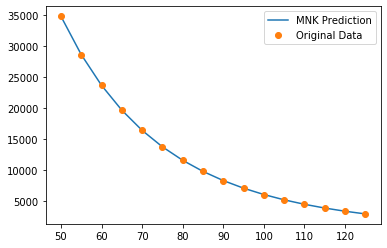

In [59]:
s = [0.001,1000,100]
def fun2(x,b1,b2,b3):
    return b1 * np.exp(b2/(x+b3))
y3 = np.empty (16,  dtype=np.float)
d, _ = curve_fit(fun2, x, y, s)
print("[b1 b2 b3] =", d)
for i in range(0, 16):
    y3[i] = fun2(x[i], d[0], d[1], d[2])
plt.plot(x, y3,  label='MNK Prediction')
plt.plot(x, y, "o",  label='Original Data')
plt.legend()
pass

Невооружённым вгзлядом видно, настолько точна вторая модель. Подкрепим это предположение расчётами.

Общую ошибку обеих моделей вычислим по данной формуле: $ \bar{err} = \frac{\sum_{i=1}^n err_i^2}{n} = \frac{\sum_{i=1}^n (y_i - f_i(x))^2}{n} $

In [60]:
er1 = np.array (y - y2)
for i in range (0,16):
    er1[i] = er1[i]**2
error1 = sum(er1)/16

er2 = np.array (y - y3)
for i in range (0,16):
    er2[i] = er2[i]**2
error2 = sum(er2)/16

print("Ошибка модели 1 = ", error1)
print("Ошибка модели 2 = ", error2)

Ошибка модели 1 =  122814.78083633968
Ошибка модели 2 =  8.841784846867363


### Вывод:
    
    Цифры говорят за себя: вторая модель оказалась гораздо точнее первой, хотя графически она довольно близка к исходным данных, а компьютерной математике вполне под силу решить подобные переопределённые системы уравнений с множеством неизвестных. Очевидно, что точность решения напрямую зависит от количества переменных, по которым составляется уравнение.